In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
! pip install optuna
import optuna
from tensorflow.keras import layers, models, Sequential

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
# let's see the training data and labels for first column data
print(f"Training sample:\n{train_images[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

Training labels:
[6]



In [4]:
# let's see the shape of our training sets
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

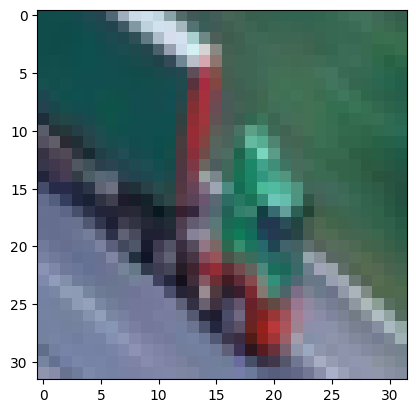

In [5]:
# let's us see single image from train set
plt.imshow(train_images[50])

In [6]:
# lets create a labels of
image_labels = ["Airplane",  "Automobile",  "Bird",  "Cat",  "deer", "Dog", "Frog",  "Horse", "Ship", "Truck"]

(-0.5, 31.5, 31.5, -0.5)

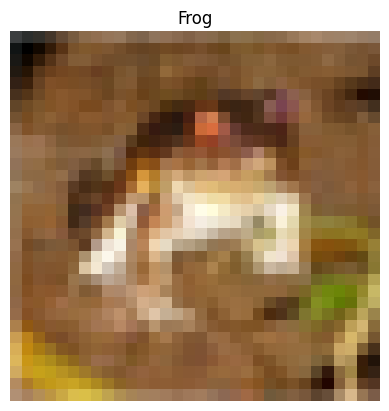

In [7]:
# let's see images with labels
im_index = 0
plt.imshow(train_images[im_index])
plt.title(image_labels[train_labels[im_index][0]])
plt.axis(False)


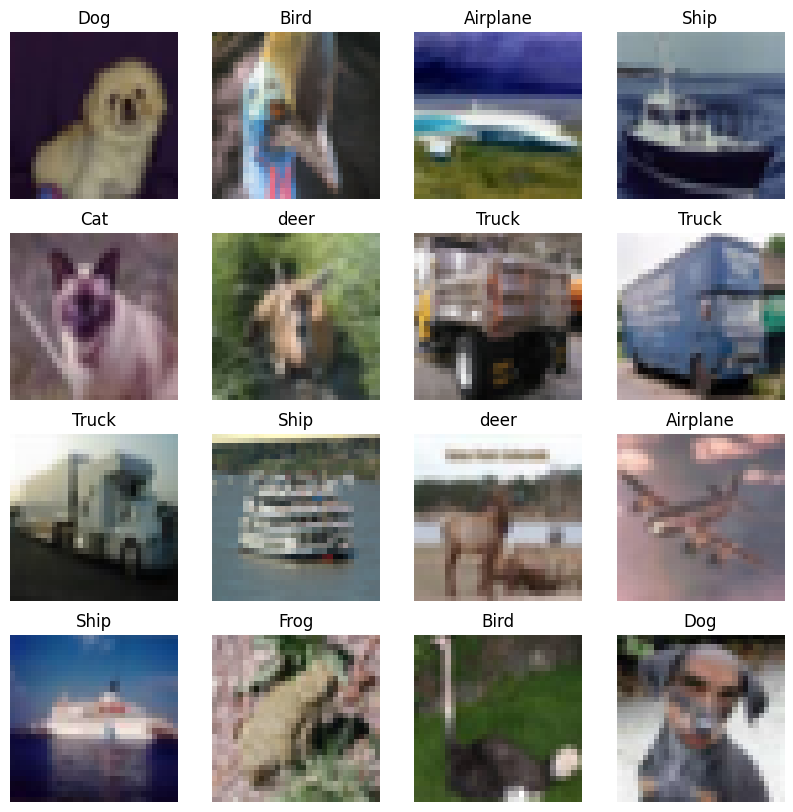

In [8]:
# create a function to dipslay multiple images
import random

plt.figure(figsize=(10, 10))
for i in range(16):
  rand_index = random.choice(range(len(train_images)))
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(train_images[rand_index])
  plt.title(image_labels[train_labels[rand_index][0]])
  plt.axis(False)

In [9]:
train_image_norm = train_images.astype("float32") / 255.0
test_image_norm = test_images.astype("float32") / 255.0

In [10]:
from keras.optimizers.adafactor import learning_rate_schedule
# hyper parameters
learning_rate = 0.001
dropout_rate = 0.1

# create a model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Flatten())
model.add(layers.Dense(110, activation="relu"))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(120, activation="relu"))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(130, activation="relu"))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(10, activation="softmax"))

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

# train the model | fit the model
model.fit(train_image_norm, train_labels, epochs=90, validation_data=(test_image_norm, test_labels))

Epoch 1/90


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 101s 63ms/step - loss: 1.5429 - accuracy: 0.4332 - val_loss: 1.2173 - val_accuracy: 0.5648
Epoch 2/90
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1872 - accuracy: 0.5814 - val_loss: 1.0585 - val_accuracy: 0.6364
Epoch 3/90
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0435 - accuracy: 0.6365 - val_loss: 0.9888 - val_accuracy: 0.6587
Epoch 4/90
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9589 - accuracy: 0.6675 - val_loss: 0.9575 - val_accuracy: 0.6668
Epoch 5/90
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8915 - accuracy: 0.6896 - val_loss: 0.9011 - val_accuracy: 0.6841
Epoch 6/90
1563/1563 [==============================] - 84s 53ms/step - loss: 0.8404 - accuracy: 0.7088 - val_loss: 0.8856 - val_accuracy: 0.6980
Epoch 7/90
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7952 - accuracy: 0.7228 - val_loss: 0.8678 - val_accur